# __Regression construction using sklearn and visualization using  matplotlib__

>## <span style="font-family:Times New Roman">Regressions that we will use</span>
>- ### [LinearRegression][id]
[id]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
>- ### [RandomForestRegressor][id1] 
[id1]: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
>- ### [DecisionTreeRegressor][id2]
[id2]: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor
>- ### [GradientBoostingRegressor][id3]
[id3]: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradientboostingregressor#sklearn.ensemble.GradientBoostingRegressor

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Function for cleaning columns

In [15]:
def ClearData(column_1,column_2):
    label_encoder = preprocessing.LabelEncoder()
    columns=[column_1,column_2]
    for column in columns:
        pd.to_numeric(df1[column], downcast="float", errors='ignore')
        if (df1[column].dtype =='object') or (df1[column].isnull().values.any()):
            anyvalues = pd.unique(df1[column])
            for i in range(len(anyvalues)):
                df1[column]= label_encoder.fit_transform(df1[column])
            if df1[column].isnull().values.any():
                df1[column] = df1[column].fillna(df1[column].mean())           

### Read the filename and see if it’s there

In [3]:
name_file = input("Enter the name of the .csv file: ")+'.csv'
try:
    df=pd.read_csv(name_file)
except:
    print('You entered incorrect name ')

Enter the name of the .csv file: GDP by County


# <center> Database </center>

In [4]:
df.head(20)

,index,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
0,0,2001,1001,Southeast,East South Central,Alabama,AL,Autauga,Autauga County,954588000
1,1,2001,1003,Southeast,East South Central,Alabama,AL,Baldwin,Baldwin County,3929753000
2,2,2001,1005,Southeast,East South Central,Alabama,AL,Barbour,Barbour County,813278000
3,3,2001,1007,Southeast,East South Central,Alabama,AL,Bibb,Bibb County,292693000
4,4,2001,1009,Southeast,East South Central,Alabama,AL,Blount,Blount County,810381000
5,5,2001,1011,Southeast,East South Central,Alabama,AL,Bullock,Bullock County,239593000
6,6,2001,1013,Southeast,East South Central,Alabama,AL,Butler,Butler County,449006000
7,7,2001,1015,Southeast,East South Central,Alabama,AL,Calhoun,Calhoun County,3437327000
8,8,2001,1017,Southeast,East South Central,Alabama,AL,Chambers,Chambers County,846573000
9,9,2001,1019,Southeast,East South Central,Alabama,AL,Cherokee,Cherokee County,391607000


### Enter the name column

In [5]:
column1, column2 = input("Enter the name of first column: "), input("Enter the name of second column: ")
predict_for_df = True
try:
    df1 = df[[column1, column2]]
except:
    print('You entered incorrect column ')

Enter the name of first column: State
Enter the name of second column: GDP (Chained $)


### Clear data and reaplace incorrect values

In [16]:
df1.dropna(axis='index', how='all', subset=[column1,column2])
ClearData(column1,column2)
string_col = df1.select_dtypes(include="object").columns
df1[string_col]=df1[string_col].astype("float")
df1[10:]

,State,GDP (Chained $)
10,0,624519000
11,0,628888000
12,0,675411000
13,0,320079000
14,0,271460000
...,...,...
55558,50,3836603000
55559,50,2166420000
55560,50,906587000
55561,50,358104000


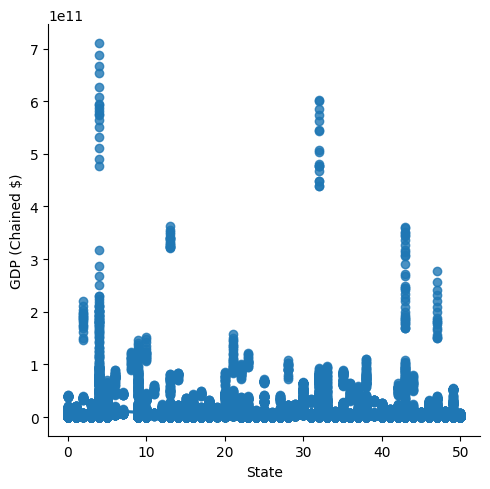

In [17]:
sns.lmplot(x =column1, y =column2, data = df1, order = 5, ci = None, )

### Preparing our data for training

In [9]:
X = np.array(df1[column1]).reshape(-1, 1)
y = np.array(df1[column2]).reshape(-1, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Check data size
We need this to predict values for trees and gradient

In [11]:
if X.shape[0] > 5000 or y.shape[0]>5000:
    predict_for_df=False

## <center> LinearRegression </center>

# <center> Algorithm </center>
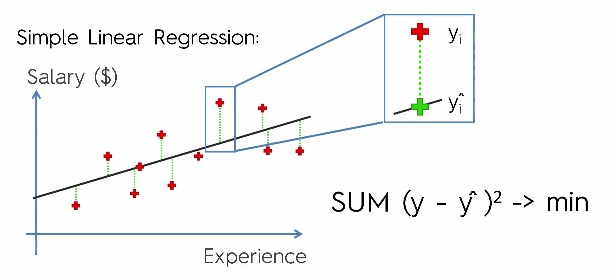

### Сreate a model and train it on our data

In [12]:
regr_line = LinearRegression()
regr_line.fit(X_train, y_train)

LinearRegression()

### Print score and MAE

In [13]:
y_pred_line = regr_line.predict(X_test)
print("Score:",regr_line.score(X_test, y_test))
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_line)
print("MAE:",mae)

Score: 0.0005340717086506075
MAE: 6792804847.108396


### <center> Visualization </center> 

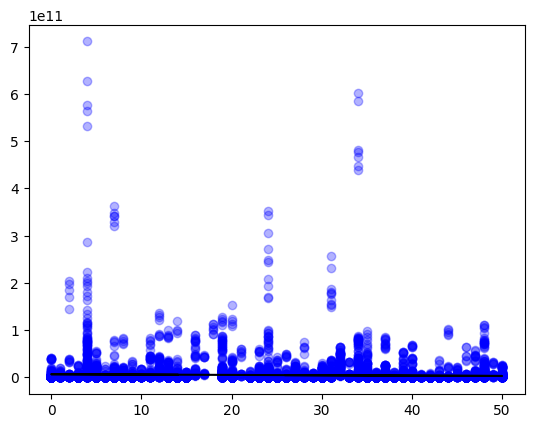

In [14]:
plt.scatter(X_test, y_test, color ='b',  alpha=0.3)
plt.plot(X_test, y_pred_line, color ='black')
  
plt.show()

### RandomForestRegressor

# <center> Algorithm </center>
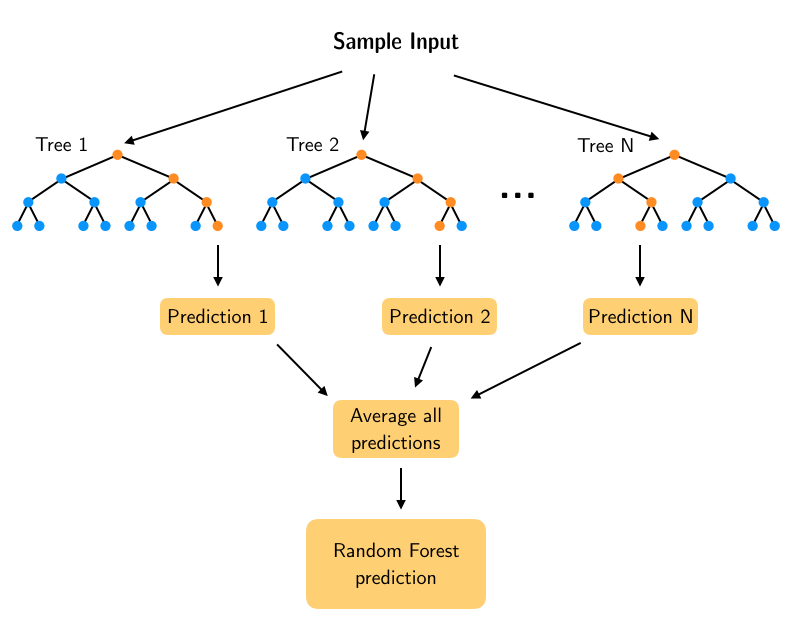

### Сreate a model 

In [15]:
reg_fr = RandomForestRegressor()

### Looking for the best parameter values:
- max_features
- max_depth
- n_estimators

In [16]:
param_grid_frofr = {
    'max_features' : [2,10,20],
    'max_depth': [10,20,30],
    'n_estimators': [100, 200, 300, 1000]
}

In [17]:
if predict_for_df:
    grid_search_fr = GridSearchCV(estimator = reg_fr , param_grid = param_grid_frofr, cv = 3, n_jobs = -1)
    grid_search_fr.fit(X_train, y_train)
    best_n_est_rf = grid_search_fr.best_params_.get('n_estimators')
    best_m_depth_rf = grid_search_fr.best_params_.get('max_depth')
    best_m_features_rf = grid_search_fr.best_params_.get('max_features')
else:
    best_n_est_rf = 10
    best_m_depth_rf = 30
    best_m_features_rf = 1000

### Train model

In [18]:
reg_fr = RandomForestRegressor(n_estimators=best_n_est_rf, max_depth=best_m_depth_rf, max_features = best_m_features_rf)
reg_fr.fit(X_train,y_train)

<ipython-input-18-b9d740c029bd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_fr.fit(X_train,y_train)


RandomForestRegressor(max_depth=30, max_features=1000, n_estimators=10)

### Print score and MAE

In [19]:
y_pred_fr = reg_fr.predict(X_test)
print("Score:",reg_fr.score(X_test, y_test))
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_fr)
print("MAE:",mae)

Score: 0.08484582614704572
MAE: 5941225548.783173


### <center> Visualization </center> 

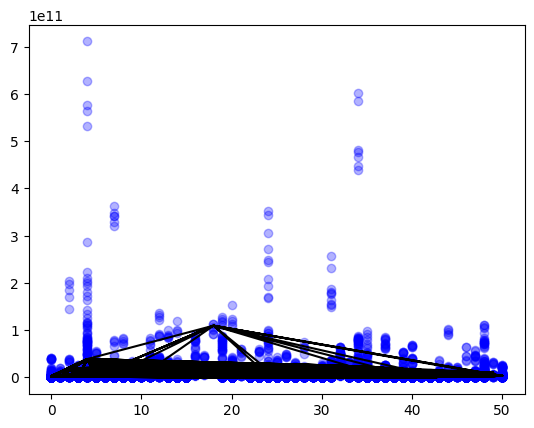

In [20]:
plt.scatter(X_test, y_test, color ='b',  alpha=0.3)
plt.plot(X_test, y_pred_fr, color ='black')
  
plt.show()

### DecisionTreeRegressor

# <center> Algorithm </center>
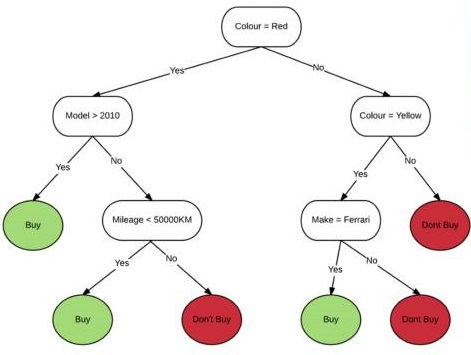

### Looking for the best parameter values:
- max_features
- max_depth

In [21]:
reg_fd = DecisionTreeRegressor()
param_grid_frofd = {
    'max_features' : [2, 10, 20],
    'max_depth': [1, 20, 30],}

In [22]:
if predict_for_df:    
    grid_search_fd = GridSearchCV(estimator = reg_fd , param_grid = param_grid_frofd, cv = 3, n_jobs = -1)
    grid_search_fd.fit(X_train, y_train)
    best_m_depth_rd = grid_search_fd.best_params_.get('max_depth')
    best_m_features_rd = grid_search_fd.best_params_.get('max_features')
else:
    best_m_depth_rd = 10
    best_m_features_rd = 30

### Train model

In [23]:
reg_fd = DecisionTreeRegressor(max_depth=best_m_depth_rd, max_features = best_m_features_rd)
reg_fd.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features=30)

### Print score and MAE

In [24]:
y_pred_fd = reg_fd.predict(X_test)
print("Score:",reg_fd.score(X_test, y_test))
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_fd)
print("MAE:",mae)

Score: 0.08526896216402347
MAE: 5947899308.084175


### <center> Visualization </center> 

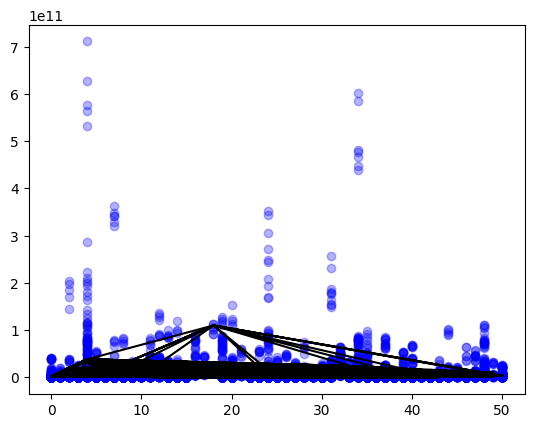

In [25]:
plt.scatter(X_test, y_test, color ='b',  alpha=0.3)
plt.plot(X_test, y_pred_fd, color ='black')
plt.show()

### GradientBoostingRegressor

# <center> Algorithm </center>
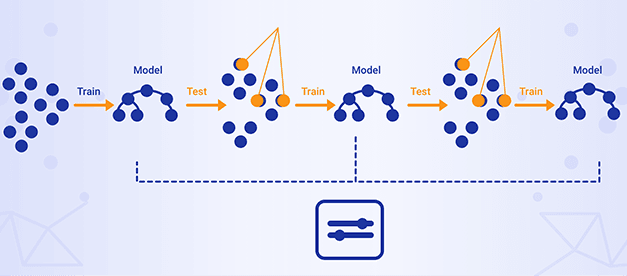

### Looking for the best parameter values:
- max_features
- max_depth

In [26]:
reg_gbr = GradientBoostingRegressor()
param_grid_frogbr = {
    'max_features' : [2,5,10,20],
    'max_depth': [1,10,20,30],}

In [27]:
if predict_for_df:    
    grid_search_gbr = GridSearchCV(estimator = reg_gbr , param_grid = param_grid_frogbr, cv = 3, n_jobs = -1)
    grid_search_gbr.fit(X_train, y_train)
    best_m_depth_gbr = grid_search_gbr.best_params_.get('max_depth')
    best_m_features_gbr = grid_search_gbr.best_params_.get('max_features')
else:
    best_m_depth_gbr = 30
    best_m_features_gbr = 10

### Train model

In [28]:
reg_gbr = GradientBoostingRegressor(max_depth=best_m_depth_gbr, max_features = best_m_features_gbr, random_state = 1)
reg_gbr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=30, max_features=10, random_state=1)

### Print score and MAE

In [29]:
y_pred_reg_gbr = reg_gbr.predict(X_test)
print("Score:",reg_gbr.score(X_test, y_test))
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_reg_gbr)
print("MAE:",mae)

Score: 0.08526943011787302
MAE: 5947901321.931278


### <center> Visualization </center> 

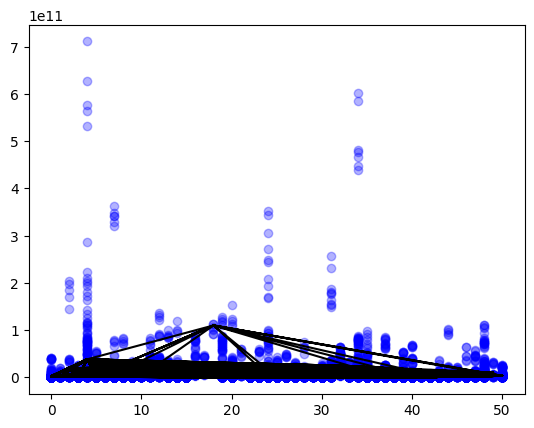

In [30]:
plt.scatter(X_test, y_test, color ='b',  alpha=0.3)
plt.plot(X_test, y_pred_reg_gbr, color ='black')
plt.show()